In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaspi-data/salary_train.csv
/kaggle/input/kaspi-data/salary_example_submition.csv
/kaggle/input/kaspi-data/salary_predict.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sys
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

import string
from nltk.util import ngrams
from collections import Counter
from sklearn.preprocessing import PolynomialFeatures


from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from tqdm.notebook import tqdm
from catboost import CatBoostRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression


In [3]:
import re
RANDOM_SEED = 42 
VAL_SIZE   = 0.2 # train = 0.8

In [4]:
salary_predict = pd.read_csv('../input/kaspi-data/salary_predict.csv', low_memory=False)
salary_example = pd.read_csv('../input/kaspi-data/salary_example_submition.csv', low_memory=False)
salary_train = pd.read_csv('../input/kaspi-data/salary_train.csv', low_memory=False)

In [5]:
salary_train.head()

,Id,algebra,programming,data science,robotics,economics,job,salary
0,0,87,62,86,61,90,junior developer,140000
1,1,76,84,76,80,79,data scientist,780000
2,2,56,55,99,82,98,developer,210000
3,3,99,66,65,84,58,economist,420000
4,4,73,87,56,84,73,data scientist,760000


In [6]:
salary_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            9000 non-null   int64 
 1   algebra       9000 non-null   int64 
 2   programming   9000 non-null   int64 
 3   data science  9000 non-null   int64 
 4   robotics      9000 non-null   int64 
 5   economics     9000 non-null   int64 
 6   job           9000 non-null   object
 7   salary        9000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 562.6+ KB


In [7]:
salary_predict.head()

,Id,algebra,programming,data science,robotics,economics,job,salary
0,9000,73,59,57,54,61,robotics engineer,0
1,9001,77,80,53,93,80,senior developer,0
2,9002,95,72,88,63,84,developer,0
3,9003,83,88,97,75,50,robotics engineer,0
4,9004,52,85,92,87,62,junior developer,0


In [8]:
salary_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1000 non-null   int64 
 1   algebra       1000 non-null   int64 
 2   programming   1000 non-null   int64 
 3   data science  1000 non-null   int64 
 4   robotics      1000 non-null   int64 
 5   economics     1000 non-null   int64 
 6   job           1000 non-null   object
 7   salary        1000 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 62.6+ KB


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

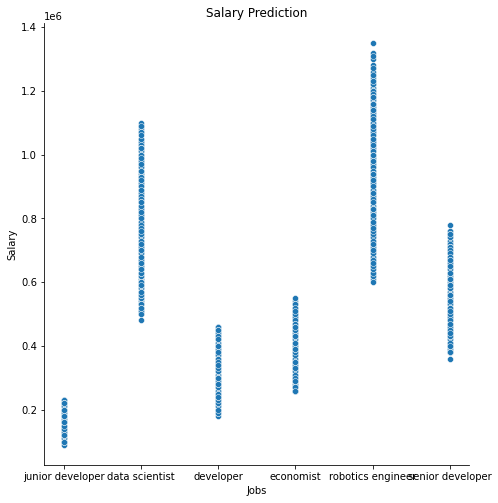

In [9]:
plt.figure(figsize=(12,6))
sns.pairplot(salary_train,x_vars=['job'],y_vars=['salary'],size=7,kind='scatter')
plt.xlabel('Jobs')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

In [10]:
salary_train.isnull().sum()

Id              0
algebra         0
programming     0
data science    0
robotics        0
economics       0
job             0
salary          0
dtype: int64

In [11]:
salary_train.describe()


,Id,algebra,programming,data science,robotics,economics,salary
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03
mean,4499.500000,74.485556,74.500111,74.349889,74.445444,74.620556,5.197633e+05
std,2598.220545,14.470835,14.489513,14.340312,14.362890,14.402834,2.805051e+05
min,0.000000,50.000000,50.000000,50.000000,50.000000,50.000000,9.000000e+04
25%,2249.750000,62.000000,62.000000,62.000000,62.000000,62.000000,3.000000e+05
50%,4499.500000,74.000000,74.000000,75.000000,74.000000,75.000000,4.600000e+05
75%,6749.250000,87.000000,87.000000,87.000000,87.000000,87.000000,7.600000e+05
max,8999.000000,99.000000,99.000000,99.000000,99.000000,99.000000,1.350000e+06


In [12]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:>

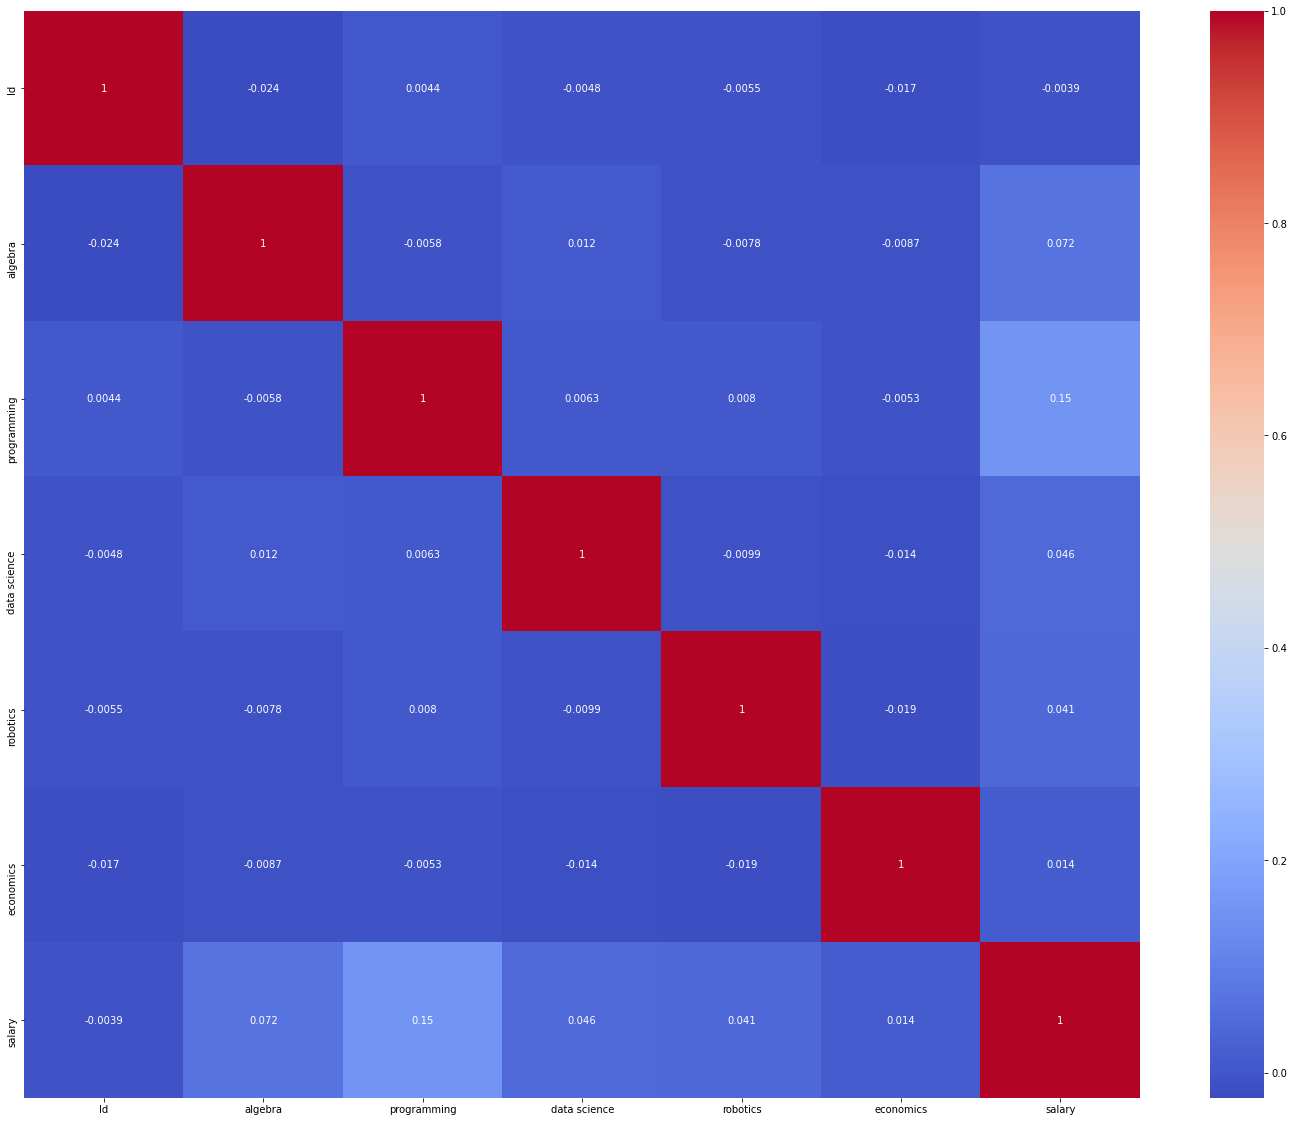

In [13]:
plt.figure(figsize=(25,20))
sns.heatmap(salary_train.corr() , cmap="coolwarm", annot=True)

In [14]:
salary_train.head()

,Id,algebra,programming,data science,robotics,economics,job,salary
0,0,87,62,86,61,90,junior developer,140000
1,1,76,84,76,80,79,data scientist,780000
2,2,56,55,99,82,98,developer,210000
3,3,99,66,65,84,58,economist,420000
4,4,73,87,56,84,73,data scientist,760000


In [15]:
for column in ['Id', 'algebra', 'programming', 'data science', 'robotics', 'job']:
    salary_train[column] = salary_train[column].astype('category').cat.codes

In [16]:
for column in ['Id', 'algebra', 'programming', 'data science', 'robotics', 'job']:
    salary_predict[column] = salary_train[column].astype('category').cat.codes


In [17]:
X = salary_train.drop('salary' , axis = 1)
y = salary_train['salary']

In [18]:
Xx = salary_predict.drop('salary' , axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=VAL_SIZE, shuffle=True, random_state=RANDOM_SEED)

In [20]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth = 15, 
                            random_state = 42, oob_score=True,) 

In [21]:
rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, n_estimators=1000, oob_score=True,
                      random_state=42)

In [23]:
y_pred = rfr.predict(X_test)

In [24]:
from sklearn.metrics import r2_score,mean_squared_error

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2694920173.197834
RMSE : 51912.62055798988


In [94]:
import xgboost as xgb

In [95]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.5,
                          learning_rate= 0.03 ,max_depth=1, alpha=1,
                          n_estimators=10000,tree_method='gpu_hist')


In [96]:
xg_reg.fit(X_train, y_train)


XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=0,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=11,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [97]:
y_pred = xg_reg.predict(X_test)

In [98]:
from sklearn.metrics import r2_score,mean_squared_error


In [99]:

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 4367929735.73582
RMSE : 66090.3149919549


In [25]:
predict_submission = rfr.predict(Xx)

In [26]:
predict_submission

array([ 154079.28638603,  790980.50148969,  223157.16373409,
        373693.72342552,  778312.67453315,  892046.21761572,
        477311.8769373 ,  365659.64815917,  398830.79291495,
        381095.92691353,  699911.98768808,  367537.87072748,
        779784.28183456,  555424.15645134,  351111.77932067,
        397426.94257073,  412472.97673554,  715422.49062865,
        593454.06499024,  412116.65653346, 1006374.70112098,
        501447.66464425,  127430.43174554,  715267.58202827,
        851668.65016708,  168303.97423942,  361551.7579704 ,
        305953.6139876 ,  533942.16000038,  544989.56037151,
        645594.61569395,  538744.75338755,  291420.81841993,
        344710.75579714,  685336.47668426,  589523.5801452 ,
        346449.60804819,  134372.16752137,  583745.54365079,
        498037.56338968,  809677.74214296,  916690.09090909,
        627463.61822344,  180044.14561332,  951915.47563668,
        287160.80476692,  373583.61059075,  321070.92880319,
        544950.39681514,

In [27]:
predict_submission = np.around(predict_submission)
predict_submission = predict_submission.astype(int)
salary_predict['salary'] = predict_submission

In [30]:
salary_predict

,Id,algebra,programming,data science,robotics,economics,job,salary
0,0,37,12,36,11,61,3,154079
1,1,26,34,26,30,80,0,790981
2,2,6,5,49,32,84,1,223157
3,3,49,16,15,34,50,2,373694
4,4,23,37,6,34,62,0,778313
...,...,...,...,...,...,...,...,...
995,995,14,3,20,32,61,5,469170
996,996,33,14,36,16,52,5,497635
997,997,11,20,49,4,92,4,843256
998,998,32,16,12,31,87,2,413375


In [31]:
columns_drop1 = ['algebra','programming','data science','robotics','economics','job']
salary_predict.drop(columns_drop1, axis=1, inplace=True)

In [32]:
salary_predict

,Id,salary
0,0,154079
1,1,790981
2,2,223157
3,3,373694
4,4,778313
...,...,...
995,995,469170
996,996,497635
997,997,843256
998,998,413375


In [33]:
salary_predict.to_csv('submis11.csv', index=False)